Years from 2011 to 2020 and the average movie durations

In [1]:
years = list(range(2011, 2021))
avg_durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {'years': years, 'durations': avg_durations}
movie_dict

{'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90],
 'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]}

In [2]:
import pandas as pd

durations_df = pd.DataFrame(movie_dict)
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


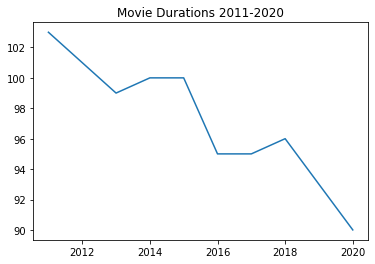

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(years, avg_durations)
plt.title('Movie Durations 2011-2020')

plt.show()

# Access to the original CSV

1.   What does this trend look like over a longer period of time?
2.   Is this explainable by something like the genre of entertainment?



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix_df = pd.read_csv('')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


'duration': perhaps number of minutes for movie vs number of seasons for tv show


In [6]:
movies = netflix_df[netflix_df['type']=='Movie']
movies_1 = movies[['title', 'country', 'genre', 'release_year', 'duration']]
movies_1.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


Visualize the data again (with individual movies) to inspect the data over a longer range of time


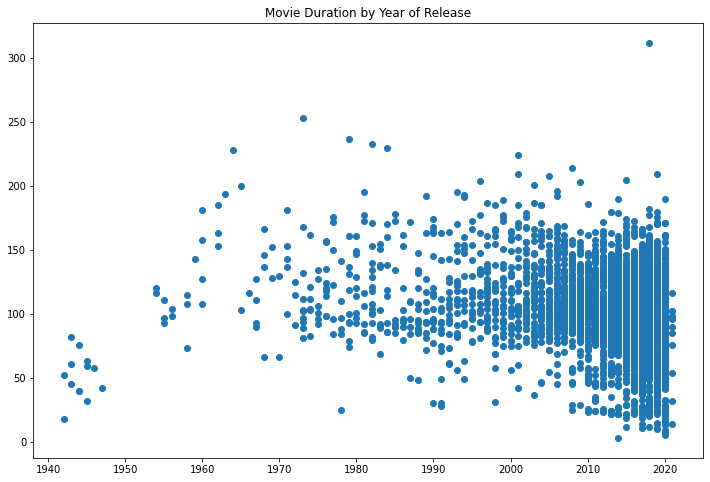

In [7]:
fig = plt.figure(figsize=(12,8))

plt.scatter(movies_1['release_year'], movies_1['duration'])
plt.title('Movie Duration by Year of Release')

plt.show()

# Dig deeper

1.   Many short movies have been released in the past two decades.
2.   Look at movies under 60 mins and the genres. Some insight into what is dragging down the average?



In [8]:
short_movies = movies_1[movies_1['duration']<60]
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


Films under 60 mins fall into genres such as Children, Stand-Up, and Documentaries.

Mark all non-typical genres in different color and plot; visually inspect whether these genres might be responsible for the decline in the avg duration of movies...


In [9]:
colors = []

for l, r in movies_1.iterrows():  #iterate over rows of movies_1
  if r['genre']=='Children':
    colors.append('tomato')
  elif r['genre']=='Documentaries':
    colors.append('skyblue')
  elif r['genre']=='Stand-Up':
    colors.append('green')
  else:
    colors.append('black')
        
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'skyblue']

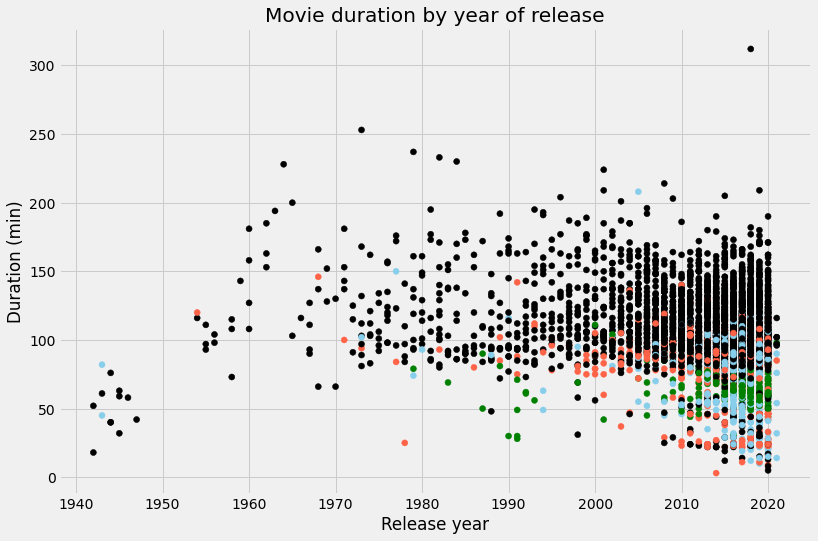

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

plt.scatter(movies_1['release_year'], movies_1['duration'], c=colors)

plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie duration by year of release')

plt.show()

Non-typical genres are clustered around the bottom half of the plot. Maybe movies are getting shorter?